# KBO Baseball Visualization

- 연봉에 영향을 미치는 의미있는 컬럼들을 찾아보고 
- 연봉 책정이 적절하게 이뤄지고 있는지 분석


## 데이터 전처리

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
data = pd.read_csv('../datacon/2019_kbo_for_kaggle_v2.csv')
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


In [50]:
data.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

#### 필요없는 컬럼 제거

- year_born (선수 태어난 연도) : "age(나이)" 항목이 있어서 이 컬럼은 제거
    - dfd
- cp (최근 포지션) : 공식적인 포지션은 "tp(통합 포지션)" 이므로 이 컬럼은 제거
- avg(타율)은 통상적으로 "선수가 얼마나 잘하는지"를 나타내는 지표로 쓰이지 않으므로 제거
- p_year(다음 시즌), YAB(다음 시즌 타석 수), YOPS(다음 시즌 OPS) 컬럼 필요없어서 제거

In [51]:
del data['year_born']
del data['cp']
del data['avg']
# del data['p_year']
# del data['YAB']
# del data['YOPS']

In [52]:
data.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,hand2,tp,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,우투우타,포수,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,우투우타,포수,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,우투우타,포수,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,우투우타,포수,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,우투우타,포수,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691


---

## 포지션 별 연봉 데이터 분석

> 시즌 별 선수들이 중복되어서 들어가있는데 연봉 데이터를 어떻게할까...?
> 
> 일단, 최근 2018년 시즌을 하나 선택해서 진행해보자

In [14]:
data18 = data[data['year'] == 2018]

In [15]:
data18

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,year,salary,war,hand2,tp,1B,FBP,OBP,SLG,OPS
5,백용환,29.0,34.0,57.0,47.0,7.0,13.0,1.0,0.0,0.0,...,2018,5300,0.083,우투우타,포수,12.0,9.0,0.393,0.298,0.691
6,신범수,20.0,19.0,26.0,25.0,0.0,4.0,2.0,1.0,0.0,...,2018,2900,-0.231,우투좌타,포수,1.0,0.0,0.154,0.320,0.474
10,김민식,29.0,125.0,365.0,310.0,53.0,76.0,9.0,3.0,6.0,...,2018,15000,0.941,좌타우투,포수,58.0,42.0,0.333,0.352,0.685
13,한승택,24.0,61.0,101.0,89.0,10.0,22.0,6.0,0.0,3.0,...,2018,7500,0.493,우투우타,포수,13.0,9.0,0.316,0.416,0.732
17,황윤호,25.0,82.0,62.0,57.0,11.0,9.0,1.0,0.0,0.0,...,2018,3100,-0.486,우타우투,2루수,8.0,3.0,0.200,0.175,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,홍재호,31.0,56.0,87.0,76.0,16.0,20.0,6.0,0.0,1.0,...,2018,3500,-0.134,우투우타,3루수,13.0,8.0,0.333,0.382,0.715
1816,김종민,32.0,6.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2018,5300,-0.089,우타우투,포수,0.0,0.0,0.000,0.000,0.000
1853,김현수,30.0,117.0,511.0,453.0,95.0,164.0,39.0,2.0,20.0,...,2018,140000,5.561,우투좌타,좌익수,103.0,48.0,0.415,0.589,1.004
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,2018,30000,3.315,우투우타,3루수,93.0,59.0,0.374,0.493,0.867


### 1. 포지션 종류

In [22]:
counts = data18['tp'].value_counts()
counts

좌익수     30
2루수     28
포수      26
우익수     26
유격수     22
3루수     21
중견수     19
1루수     16
지명타자     7
Name: tp, dtype: int64

In [27]:
positions = counts.index
positions

Index(['좌익수', '2루수', '포수', '우익수', '유격수', '3루수', '중견수', '1루수', '지명타자'], dtype='object')

좌익수가 30으로 가장 많고, 지명타자가 7로 가장 적습니다.

### 2. 2018년 포지션 별 salary 분포

<AxesSubplot:title={'center':'2018년'}, xlabel='tp', ylabel='salary'>

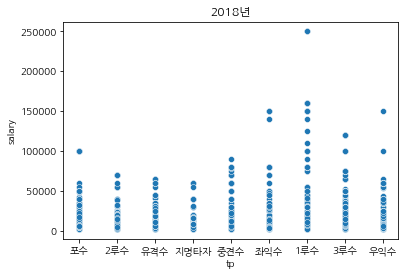

In [145]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

plt.title('2018년')
sns.scatterplot(x = data['tp'], y = data['salary'])

2018년 기준으로 데이터를 살펴보면, 선수가 적은 축에 속한 1루수 선수들이 비교적 높은 연봉을 받고 있음을 알 수 있습니다.

### 3. 년도별 연봉 평균 

In [177]:
mean_salary = data[['year', 'tp', 'salary']].groupby(['year', 'tp']).mean()
mean_salary = mean_salary.reset_index()
mean_salary

,year,tp,salary
0,1990,1루수,2400.000000
1,1990,2루수,2400.000000
2,1990,우익수,2400.000000
3,1990,좌익수,2400.000000
4,1990,중견수,2400.000000
...,...,...,...
219,2018,유격수,15154.545455
220,2018,좌익수,20586.666667
221,2018,중견수,16457.894737
222,2018,지명타자,19442.857143


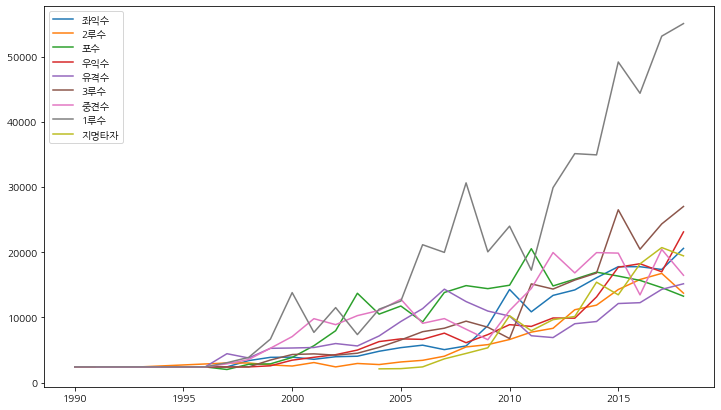

In [193]:
plt.figure(figsize=(12, 7))

for p in positions:
    d = mean_salary[mean_salary['tp'] == p]
    plt.plot(d['year'], d['salary'], label=p)
    
plt.legend()
plt.show()

---

## Salary 상관관계

### 1. was와 salary 상관관계

<AxesSubplot:xlabel='war', ylabel='salary'>

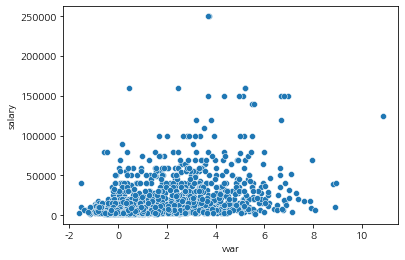

In [146]:
sns.scatterplot(x = data['war'], y = data['salary'])

### 2. OPS와 salary 상관관계

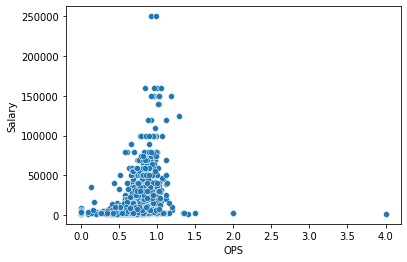

In [31]:
sns.scatterplot(x = data['OPS'], y = data['salary'])
plt.xlabel('OPS')
plt.ylabel('Salary')
plt.show()

##### 신인 연봉제한때문에 5~6년차 까지의 데이터는 war이나 ops 모두 상관관계가 별로 없었을 수 있음

5년차 이상 선수들 기준은 어떻게 판단하지..? 외부 데이터를 추가..?

In [53]:
data['war'].max()

10.873

In [ ]:
# data[data['war']]

### 3. "올해 연봉 대비 다음해 연봉 상승률"에 대한 상관관계

#### 다음해 연봉 데이터 채우기

In [118]:
for idx, name, salary in zip(data.index, data.batter_name, data.salary):
    if len(data) == idx+1:
        break
        
    next_name = data.at[idx+1, 'batter_name']
    if name != next_name:
        continue
    next_salary = data.at[idx+1, 'salary']
    data.at[idx, 'p_salary'] = next_salary

In [119]:
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,p_salary
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580,2900.0
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784,6000.0
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581,6000.0
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476,5500.0
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691,5300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.374,0.493,0.867,2019,395.0,0.768,NaN
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.365,0.319,0.684,2018,13.0,0.154,6200.0
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.154,2019,188.0,0.720,NaN
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.344,0.505,0.849,2016,523.0,0.889,50000.0


#### 상승률 계산이 가능하도록 NaN인 row는 빼고 상관관계를 살펴봄

In [120]:
salary_growth_data = data[pd.notna(data['p_salary'])]
salary_growth_data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,p_salary
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580,2900.0
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784,6000.0
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581,6000.0
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476,5500.0
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691,5300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,이원석,27.0,85.0,300.0,264.0,40.0,83.0,12.0,0.0,10.0,...,3루수,61.0,32.0,0.385,0.473,0.858,2014,231.0,0.676,15000.0
1906,이원석,30.0,7.0,22.0,19.0,3.0,6.0,3.0,0.0,2.0,...,3루수,1.0,2.0,0.364,0.789,1.153,2017,411.0,0.773,30000.0
1907,이원석,31.0,121.0,459.0,411.0,55.0,109.0,20.0,1.0,18.0,...,3루수,70.0,38.0,0.323,0.450,0.773,2018,479.0,0.867,30000.0
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.365,0.319,0.684,2018,13.0,0.154,6200.0


In [121]:
growth = salary_growth_data.apply(lambda d : (d['p_salary'] - d['salary']) / 100, axis=1)
growth

0         4.0
1        31.0
2         0.0
3        -5.0
4        -2.0
        ...  
1905     50.0
1906    150.0
1907      0.0
1909     31.0
1911      0.0
Length: 1575, dtype: float64

In [148]:
salary_growth_data.loc[:, 'salary_growth_rate'] = growth

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [123]:
salary_growth_data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,p_salary,salary_growth_rate
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580,2900.0,4.0
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784,6000.0,31.0
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581,6000.0,0.0
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476,5500.0,-5.0
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691,5300.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,이원석,27.0,85.0,300.0,264.0,40.0,83.0,12.0,0.0,10.0,...,61.0,32.0,0.385,0.473,0.858,2014,231.0,0.676,15000.0,50.0
1906,이원석,30.0,7.0,22.0,19.0,3.0,6.0,3.0,0.0,2.0,...,1.0,2.0,0.364,0.789,1.153,2017,411.0,0.773,30000.0,150.0
1907,이원석,31.0,121.0,459.0,411.0,55.0,109.0,20.0,1.0,18.0,...,70.0,38.0,0.323,0.450,0.773,2018,479.0,0.867,30000.0,0.0
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,44.0,28.0,0.365,0.319,0.684,2018,13.0,0.154,6200.0,31.0


#### 상승률이 가장 높은 사람은 어떤 선수일까?

In [129]:
salary_growth_data['salary_growth_rate'].max()

2110.0

In [130]:
salary_growth_data[salary_growth_data['salary_growth_rate'] == 2110]

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,p_salary,salary_growth_rate
1337,이대호,28.0,127.0,552.0,478.0,99.0,174.0,13.0,0.0,44.0,...,117.0,71.0,0.444,0.667,1.111,2011,493.0,1.011,250000.0,2110.0


#### 상승률이 0인 선수는 어떤 선수들일까?

In [131]:
salary_growth_data[salary_growth_data['salary_growth_rate'] == 0]

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,p_salary,salary_growth_rate
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581,6000.0,0.0
7,김민식,26.0,23.0,26.0,24.0,4.0,4.0,0.0,0.0,0.0,...,4.0,2.0,0.231,0.167,0.398,2016,144.0,0.720,3000.0,0.0
8,김민식,27.0,88.0,170.0,144.0,17.0,37.0,9.0,0.0,2.0,...,26.0,23.0,0.359,0.361,0.720,2017,352.0,0.576,3000.0,0.0
14,황윤호,22.0,10.0,6.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.167,0.000,0.167,2016,12.0,0.166,2700.0,0.0
36,이창진,23.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.500,1.000,1.500,2015,19.0,0.411,2400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,이승엽,37.0,111.0,483.0,443.0,62.0,112.0,24.0,0.0,13.0,...,75.0,32.0,0.298,0.395,0.693,2014,506.0,0.915,80000.0,0.0
1895,이승엽,39.0,122.0,522.0,470.0,87.0,156.0,28.0,1.0,26.0,...,101.0,46.0,0.387,0.562,0.949,2016,542.0,0.898,100000.0,0.0
1900,이원석,22.0,53.0,134.0,120.0,14.0,33.0,7.0,0.0,0.0,...,26.0,8.0,0.320,0.333,0.653,2009,376.0,0.794,6800.0,0.0
1907,이원석,31.0,121.0,459.0,411.0,55.0,109.0,20.0,1.0,18.0,...,70.0,38.0,0.323,0.450,0.773,2018,479.0,0.867,30000.0,0.0


##### 연봉 동결은 언제나 있을 수 있기 때문에 상승률이 0인 row는 빼고 데이터를 살펴보겠습니다.

In [140]:
salary_only_growth_data = salary_growth_data[salary_growth_data['salary_growth_rate'] != 0]
salary_only_growth_data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,p_salary,salary_growth_rate
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580,2900.0,4.0
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784,6000.0,31.0
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476,5500.0,-5.0
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691,5300.0,-2.0
9,김민식,28.0,137.0,392.0,352.0,39.0,78.0,9.0,2.0,4.0,...,63.0,31.0,0.283,0.293,0.576,2018,310.0,0.685,15000.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,이원석,25.0,110.0,311.0,264.0,36.0,57.0,11.0,0.0,8.0,...,38.0,32.0,0.298,0.348,0.646,2012,325.0,0.731,8400.0,-10.0
1904,이원석,26.0,107.0,372.0,325.0,36.0,87.0,13.0,2.0,8.0,...,64.0,35.0,0.337,0.394,0.731,2013,264.0,0.858,10000.0,16.0
1905,이원석,27.0,85.0,300.0,264.0,40.0,83.0,12.0,0.0,10.0,...,61.0,32.0,0.385,0.473,0.858,2014,231.0,0.676,15000.0,50.0
1906,이원석,30.0,7.0,22.0,19.0,3.0,6.0,3.0,0.0,2.0,...,1.0,2.0,0.364,0.789,1.153,2017,411.0,0.773,30000.0,150.0


#### 연봉 상승률과 war의 상관관계

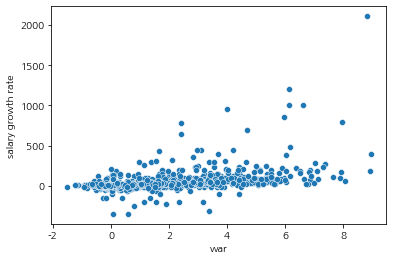

In [147]:
sns.scatterplot(x = salary_only_growth_data['war'], y = salary_only_growth_data['salary_growth_rate'])
plt.xlabel('war')
plt.ylabel('salary growth rate')
plt.show()

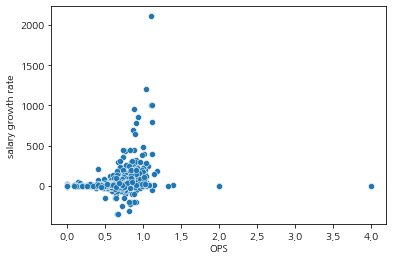

In [149]:
sns.scatterplot(x = salary_only_growth_data['OPS'], y = salary_only_growth_data['salary_growth_rate'])
plt.xlabel('OPS')
plt.ylabel('salary growth rate')
plt.show()